In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d

In [2]:
import numpy as np

def moving_average(data, window_size=5):
    # pad_size = window_size // 2
    # padded_data = np.pad(data, pad_size, mode='edge')  # Extend edges
    # smoothed = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    # return smoothed

    return gaussian_filter1d(data, sigma=window_size)

# # # Example usage
# data = np.random.randn(600)  # Replace with your actual data
# smoothed_data = moving_average(data, window_size=10)  # Adjust window_size as needed

# # Plotting the smoothed data
# import matplotlib.pyplot as plt
# plt.plot(data, label="Original Data", alpha=0.5)
# plt.plot(smoothed_data, label="Smoothed Data", linewidth=2)
# plt.legend()
# plt.show()

In [3]:
avg = pd.read_excel("Graphs.xlsx", sheet_name=0)
energy =pd.read_excel("Graphs.xlsx", sheet_name=1)
real = pd.read_excel("Graphs.xlsx", sheet_name=2)
time = pd.read_excel("Graphs.xlsx", sheet_name=3)

In [4]:
# avg.head()
# energy.head()
# real.head()
# time.head()

In [5]:
DDQN = avg[["Step", "DDQN05", "DDQN10", "DDQN20"]]
DQN = avg[["Step", "DQN05", "DQN10", "DQN20"]]
energy = energy[["Step", "No Offloading", "Full Offloading", "DQN20", "DDQN10", "Random"]]
real = real[["Step", "No Offloading", "Full Offloading", "DQN20", "DDQN10", "Random"]]
time = time[["Step", "No Offloading", "Full Offloading", "DQN20", "DDQN10", "Random"]]

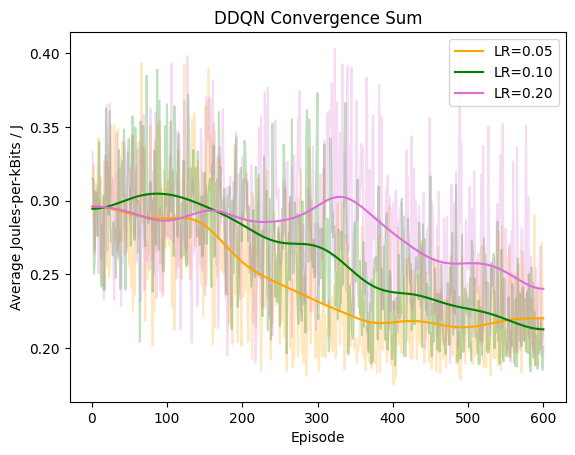

In [91]:
window_size = 30
plt.clf()
plt.title("DDQN Convergence Sum")
plt.ylabel("Average Joules-per-kBits / J")
plt.xlabel("Episode")

# plt.plot(DDQN["Step"], DDQN["DDQN05"], label="LR=0.05",alpha=1, color="orange", linewidth=1)
# plt.plot(DDQN["Step"], DDQN["DDQN10"], label="LR=0.10",alpha=0.9, color="green", linewidth=1)
# plt.plot(DDQN["Step"], DDQN["DDQN20"], label="LR=0.20", alpha=1, color="orchid", linewidth=1)

plt.plot(DDQN["Step"], DDQN["DDQN05"], alpha=0.25, color="orange")
plt.plot(DDQN["Step"], DDQN["DDQN10"], alpha=0.25, color="green")
plt.plot(DDQN["Step"], DDQN["DDQN20"], alpha=0.25, color="orchid")
smoothed_05 = (moving_average(DDQN["DDQN05"], window_size))
smoothed_10 = (moving_average(DDQN["DDQN10"], window_size))
smoothed_20 = (moving_average(DDQN["DDQN20"], window_size))
plt.plot(DDQN["Step"], smoothed_05, label="LR=0.05", alpha=1, color="orange", linewidth=1.5)
plt.plot(DDQN["Step"], smoothed_10, label="LR=0.10", alpha=1, color="green", linewidth=1.5)
plt.plot(DDQN["Step"], smoothed_20, label="LR=0.20", alpha=1, color="orchid", linewidth=1.5)

plt.legend()
plt.show()

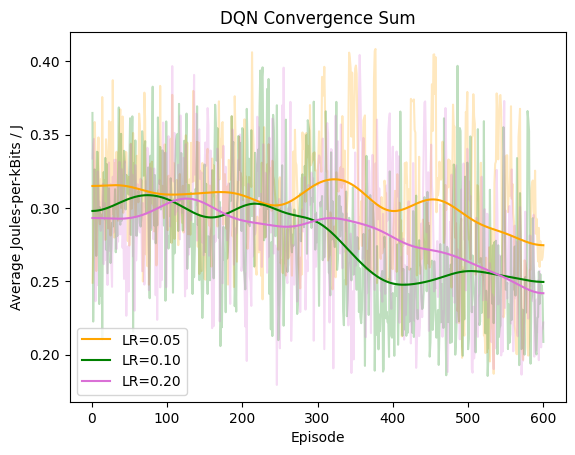

In [92]:
window_size = 30

plt.clf()
plt.title("DQN Convergence Sum")
plt.ylabel("Average Joules-per-kBits / J")
plt.xlabel("Episode")

# plt.plot(DQN["Step"], DQN["DQN05"], label="LR=0.05",alpha=1, color="orange", linewidth=1)
# plt.plot(DQN["Step"], DQN["DQN10"], label="LR=0.10",alpha=0.9, color="green", linewidth=1)
# plt.plot(DQN["Step"], DQN["DQN20"], label="LR=0.20", alpha=1, color="orchid", linewidth=1)

plt.plot(DQN["Step"], DQN["DQN05"], alpha=0.25, color="orange")
plt.plot(DQN["Step"], DQN["DQN10"], alpha=0.25, color="green")
plt.plot(DQN["Step"], DQN["DQN20"], alpha=0.25, color="orchid")
smoothed_05 = (moving_average(DQN["DQN05"], window_size))
smoothed_10 = (moving_average(DQN["DQN10"], window_size))
smoothed_20 = (moving_average(DQN["DQN20"], window_size))
plt.plot(DQN["Step"], smoothed_05, label="LR=0.05", alpha=1, color="orange", linewidth=1.5)
plt.plot(DQN["Step"], smoothed_10, label="LR=0.10", alpha=1, color="green", linewidth=1.5)
plt.plot(DQN["Step"], smoothed_20, label="LR=0.20", alpha=1, color="orchid", linewidth=1.5)

plt.legend()
plt.show()

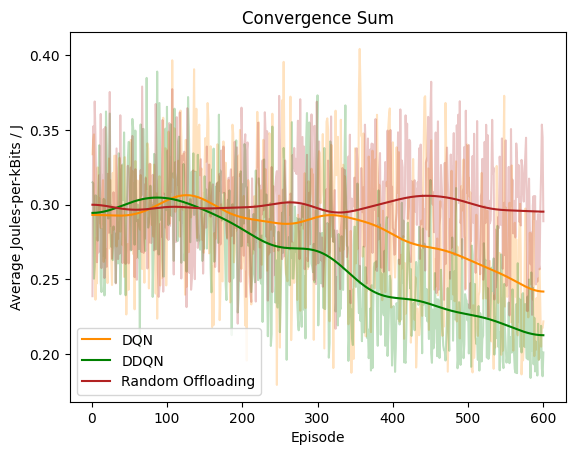

In [93]:
window_size = 30

plt.clf()
plt.title("Convergence Sum")
plt.ylabel("Average Joules-per-kBits / J")
plt.xlabel("Episode")
plt.plot(avg["Step"], avg["DQN20"], alpha=0.25, color="darkorange")
plt.plot(avg["Step"], avg["DDQN10"], alpha=0.25, color="green")
plt.plot(avg["Step"], avg["Random"], alpha=0.25, color="firebrick")

smoothed_dqn = (moving_average(avg["DQN20"], window_size))
smoothed_ddqn = (moving_average(avg["DDQN10"], window_size))
smoothed_random = (moving_average(avg["Random"], window_size))

plt.plot(avg["Step"], smoothed_dqn, label="DQN", alpha=1, color="darkorange", linewidth=1.5)
plt.plot(avg["Step"], smoothed_ddqn, label="DDQN", alpha=1, color="green", linewidth=1.5)
plt.plot(avg["Step"], smoothed_random, label="Random Offloading", alpha=1, color="firebrick", linewidth=1.5)
plt.legend()
plt.show()

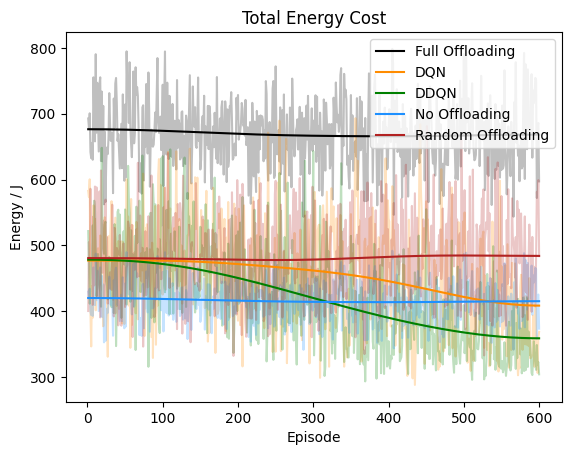

In [17]:
window_size = 100
plt.clf()
plt.title("Total Energy Cost")
plt.ylabel("Energy / J")
plt.xlabel("Episode")

plt.plot(energy["Step"], energy["Full Offloading"], alpha=0.25, color="black")
plt.plot(energy["Step"], energy["DQN20"], alpha=0.25, color="darkorange")
plt.plot(energy["Step"], energy["DDQN10"], alpha=0.25, color="green")
plt.plot(energy["Step"], energy["No Offloading"], alpha=0.25, color="dodgerblue")
plt.plot(energy["Step"], energy["Random"], alpha=0.25, color="firebrick")

smoothed_full = moving_average(energy["Full Offloading"], window_size)
smoothed_dqn = moving_average(energy["DQN20"], window_size)
smoothed_ddqn = moving_average(energy["DDQN10"], window_size)
smoothed_no = moving_average(energy["No Offloading"], window_size)
smoothed_random = moving_average(energy["Random"], window_size)

plt.plot(energy["Step"], smoothed_full, label="Full Offloading", alpha=1, color="black", linewidth=1.5)
plt.plot(energy["Step"], smoothed_dqn, label="DQN", alpha=1, color="darkorange", linewidth=1.5)
plt.plot(energy["Step"], smoothed_ddqn, label="DDQN", alpha=1, color="green", linewidth=1.5)
plt.plot(energy["Step"], smoothed_no, label="No Offloading", alpha=1, color="dodgerblue", linewidth=1.5)
plt.plot(energy["Step"], smoothed_random, label="Random Offloading", alpha=1, color="firebrick", linewidth=1.5)
plt.legend()
plt.show()

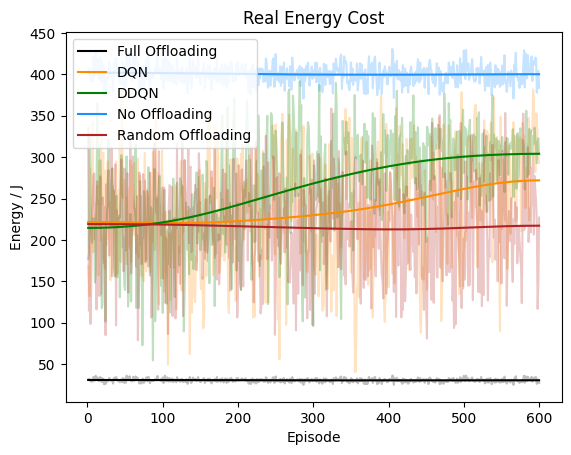

In [18]:
window_size = 100
plt.clf()
plt.title("Real Energy Cost")
plt.ylabel("Energy / J")
plt.xlabel("Episode")

plt.plot(real["Step"], real["Full Offloading"], alpha=0.25, color="black")
plt.plot(real["Step"], real["DQN20"], alpha=0.25, color="darkorange")
plt.plot(real["Step"], real["DDQN10"], alpha=0.25, color="green")
plt.plot(real["Step"], real["No Offloading"], alpha=0.25, color="dodgerblue")
plt.plot(real["Step"], real["Random"], alpha=0.25, color="firebrick")

smoothed_full = moving_average(real["Full Offloading"], window_size)
smoothed_dqn = moving_average(real["DQN20"], window_size)
smoothed_ddqn = moving_average(real["DDQN10"], window_size)
smoothed_no = moving_average(real["No Offloading"], window_size)
smoothed_random = moving_average(real["Random"], window_size)

plt.plot(real["Step"], smoothed_full, label="Full Offloading", alpha=1, color="black", linewidth=1.5)
plt.plot(real["Step"], smoothed_dqn, label="DQN", alpha=1, color="darkorange", linewidth=1.5)
plt.plot(real["Step"], smoothed_ddqn, label="DDQN", alpha=1, color="green", linewidth=1.5)
plt.plot(real["Step"], smoothed_no, label="No Offloading", alpha=1, color="dodgerblue", linewidth=1.5)
plt.plot(real["Step"], smoothed_random, label="Random Offloading", alpha=1, color="firebrick", linewidth=1.5)
plt.legend()
plt.show()

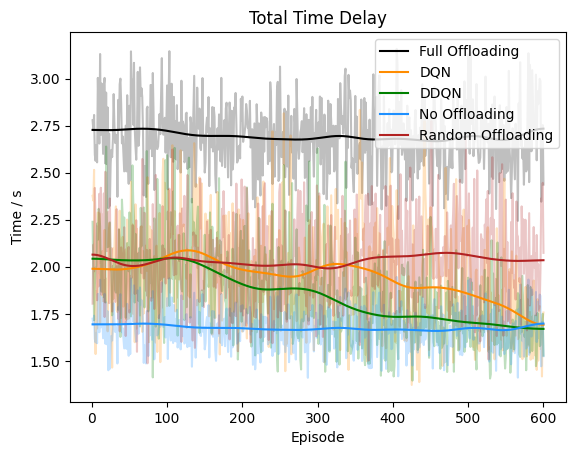

In [12]:
window_size = 25
plt.clf()
plt.title("Total Time Delay")
plt.ylabel("Time / s")
plt.xlabel("Episode")

plt.plot(time["Step"], time["Full Offloading"], alpha=0.25, color="black")
plt.plot(time["Step"], time["DQN20"], alpha=0.25, color="darkorange")
plt.plot(time["Step"], time["DDQN10"], alpha=0.25, color="green")
plt.plot(time["Step"], time["No Offloading"], alpha=0.25, color="dodgerblue")
plt.plot(time["Step"], time["Random"], alpha=0.25, color="firebrick")

smoothed_full = moving_average(time["Full Offloading"], window_size)
smoothed_dqn = moving_average(time["DQN20"], window_size)
smoothed_ddqn = moving_average(time["DDQN10"], window_size)
smoothed_no = moving_average(time["No Offloading"], window_size)
smoothed_random = moving_average(time["Random"], window_size)

plt.plot(time["Step"], smoothed_full, label="Full Offloading", alpha=1, color="black", linewidth=1.5)
plt.plot(time["Step"], smoothed_dqn, label="DQN", alpha=1, color="darkorange", linewidth=1.5)
plt.plot(time["Step"], smoothed_ddqn, label="DDQN", alpha=1, color="green", linewidth=1.5)
plt.plot(time["Step"], smoothed_no, label="No Offloading", alpha=1, color="dodgerblue", linewidth=1.5)
plt.plot(time["Step"], smoothed_random, label="Random Offloading", alpha=1, color="firebrick", linewidth=1.5)
plt.legend()
plt.show()